# CUNY 620 Web Analytics - Summer 2021 Final Project

### Desciption

We intend to examine data pertaining to S&P 500 companies and their relationship between sectors, headquarters, sentiments and financial performance we will use both text and network analysis, below are the steps we are taking to tackel this project.

•	Collect the data from web scraping.

•	Create network analysis.

•	Focus on the top nodes in terms of headquarters, implementation of island method.

•	Create sector projection, to predict the sector for each name.

•	Implement sentimental analysis for the news articles, reviews for the positive, negative and, neutral sentiments

•	Visualize animated map based on the year and headquarter of each company.

**<a href="https://en.wikipedia.org/wiki/List_of_S%26P_500_companies">By Wikipedia: </a> The S&P 500 stock market index, maintained by S&P Dow Jones Indices, comprises 505 common stocks issued by 500 large-cap companies and traded on American stock exchanges (including the 30 companies that compose the Dow Jones Industrial Average), and covers about 80 percent of the American equity market by capitalization. The index is weighted by free-float market capitalization, so more valuable companies account for relatively more of the index. The index constituents and the constituent weights are updated regularly using rules published by S&P Dow Jones Indices. Although called the S&P 500, the index contains 505 stocks because it includes two share classes of stock from 5 of its component companies.**


### Loading the data
WE are using multiple sources of data:

1- Getting the list of SP 500 companies from <a href="https://en.wikipedia.org/wiki/List_of_S%26P_500_companies">Wikipedia</a>  using webscraping 

2- Getting the weight of the coupanies from<a href="https://www.slickcharts.com/sp500"> Slickcharts</a> and saving the data in Github

3- 


In [12]:
# Loading the required libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import networkx as nx
import warnings
from networkx.algorithms import bipartite

# There are 2 tables on the Wikipedia page
# we want the first table

payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]

#reading the renaming the columns
wiki = first_table
wiki.columns = ['Symbol', 'Security', 'filings', 'Sector', 'Sub_Industry', 'Headquarters', 'Date_added', 'CIK', 'Founded']
wiki.head()

,Symbol,Security,filings,Sector,Sub_Industry,Headquarters,Date_added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [13]:
# Get the weights from github
weights=pd.read_csv('https://raw.githubusercontent.com/akarimhammoud/DATA-620/main/Week_6_final%20project/weights.csv')
weights.drop(['#', 'Company', 'Chg', '% Chg'], axis='columns', inplace=True)
weights.head()

,Symbol,Weight,Price
0,AAPL,6.151855,145.08
1,MSFT,5.720618,277.85
2,AMZN,4.379672,"3,716.00"
3,FB,2.267526,350.60
4,GOOGL,2.059196,"2,508.49"


In [14]:
# Merge both datasets
df = pd.merge(wiki,
                      weights,
                      on ='Symbol',
                      how ='inner')
df.head()

,Symbol,Security,filings,Sector,Sub_Industry,Headquarters,Date_added,CIK,Founded,Weight,Price
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902,0.313848,201.00
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888,0.580172,119.74
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),0.561722,116.58
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981,0.040224,324.77
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,0.538042,312.62


In [15]:
#Network nodes
G = nx.Graph()
G = nx.from_pandas_edgelist(df, source= 'Sector', target='Headquarters',edge_attr=True)

#add the attributes
nx.set_node_attributes(G, df['Weight'], 'Weight')
nx.set_node_attributes(G, df['Sub_Industry'], 'Sub_Industry')
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 268
Number of edges: 387
Average degree:   2.8881


In [16]:
nx.number_connected_components(G)

1

In [17]:
nx.is_connected(G)

True

In [22]:
# top degree Headquarters
sector = list(df.Sector.unique())
headq = list(df.Headquarters.unique())

#The weight
gd=pd.DataFrame(G.degree(headq)).sort_values(1,ascending =False).rename({0:'1:',1:'DEGREE'}, axis=1).set_index("1:")
print("Degree: \n", gd)

Degree: 
                         DEGREE
1:                            
New York City               10
Chicago, Illinois            7
Atlanta, Georgia             7
Dallas, Texas                6
Houston, Texas               6
...                        ...
New Orleans, Louisiana       1
Brooklyn, New York           1
Hamilton, Bermuda            1
Winona, Minnesota            1
Parsippany, New Jersey       1

[257 rows x 1 columns]


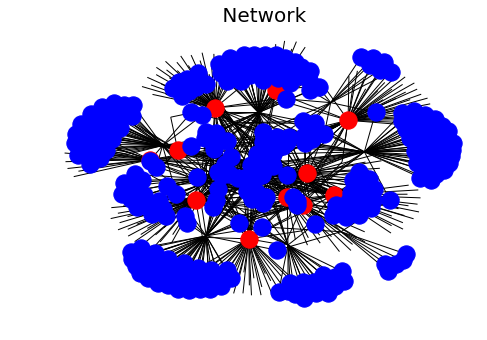

In [23]:
#visualize the network 
nx.draw(G, nodelist = sector, node_color = 'red')
nx.draw(G, nodelist = headq, node_color = 'blue')
plt.title(' Network', fontsize = 20, color = 'black')
plt.show()

In [214]:
# top degree Sectors
gd=pd.DataFrame(G.degree(sector)).sort_values(1,ascending =False).rename({0:'1:',1:'DEGREE'}, axis=1).set_index("1:")
print("Degree: \n", gd)

Degree: 
                         DEGREE
1:                            
Industrials                 59
Health Care                 55
Information Technology      54
Consumer Discretionary      50
Financials                  41
Utilities                   27
Consumer Staples            26
Materials                   25
Real Estate                 25
Communication Services      15
Energy                      10


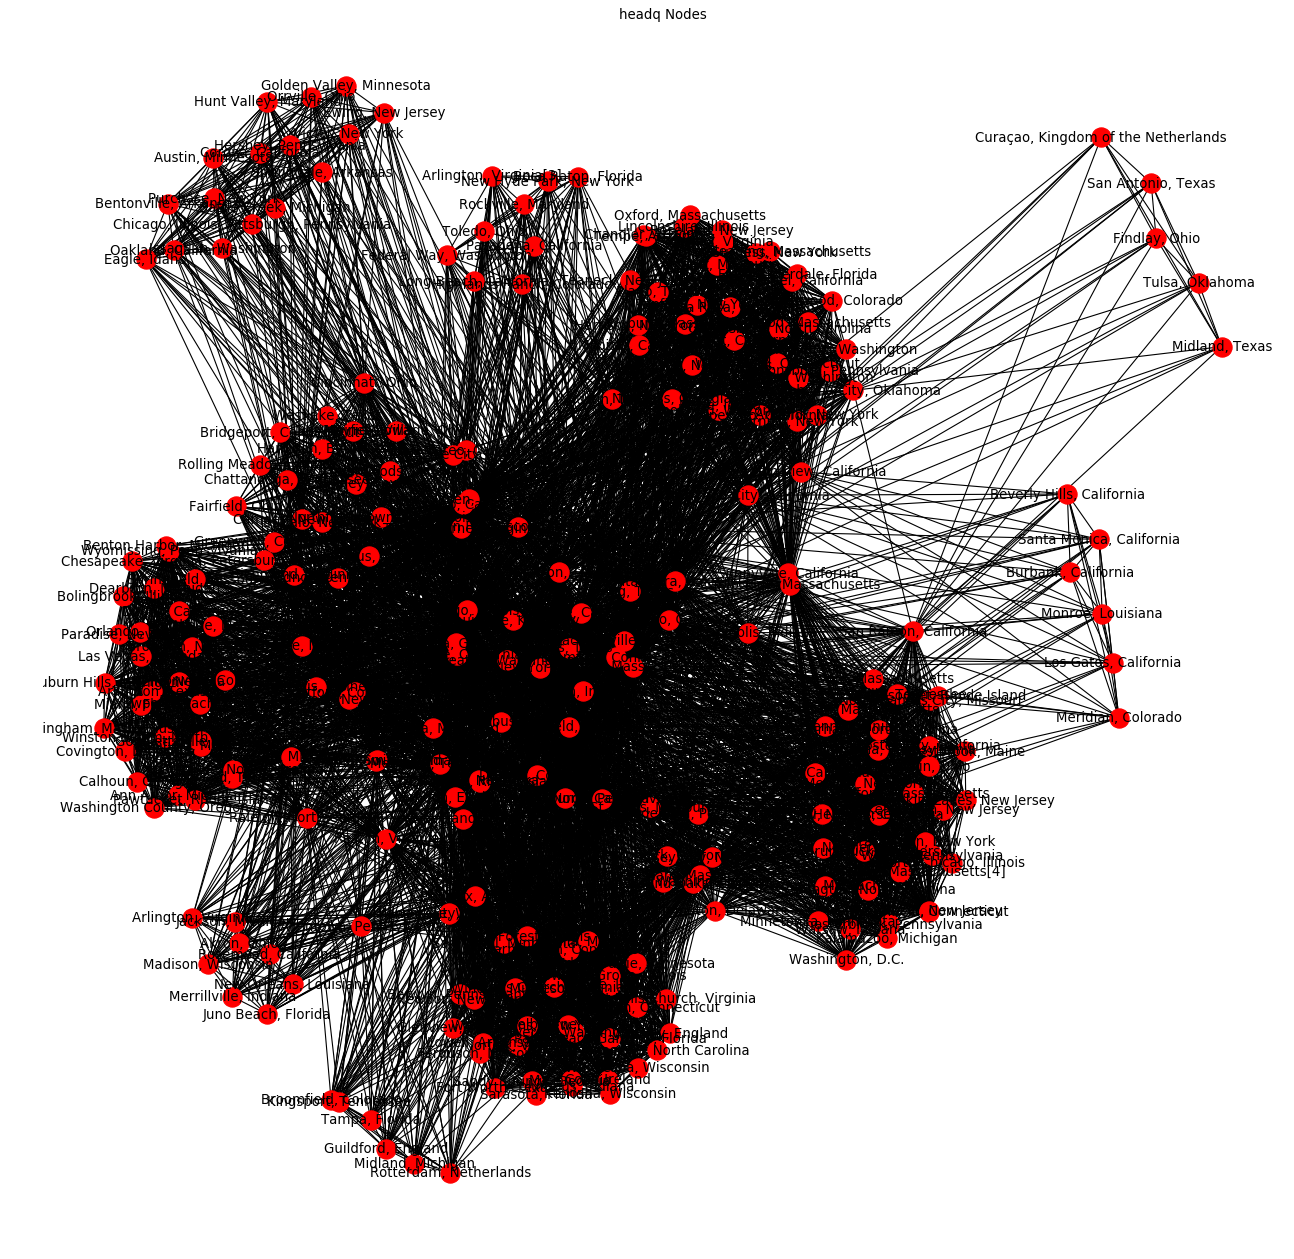

In [25]:
from networkx.algorithms import bipartite as bi

# create an affiliation network
net = bi.weighted_projected_graph(G, headq)

#Visualize entire  network
pos = nx.spring_layout(net)
plt.figure(num=None, figsize=(20, 20), dpi=80)
plt.axis('off')
fig = plt.figure(1)
nx.draw_networkx_nodes(net,pos, node_color = 'r')
nx.draw_networkx_edges(net,pos, node_color = 'r')
nx.draw_networkx_labels(net,pos)
plt.title('headq Nodes')

cut = 1.00
plt.show()

In [29]:
# create an edge view object to display edges headquarters
edges = net.edges()
list(edges.data())[0:9]

[('Saint Paul, Minnesota', 'Reston, Virginia', {'weight': 1}),
 ('Saint Paul, Minnesota', 'Guildford, England', {'weight': 1}),
 ('Saint Paul, Minnesota', 'Charlotte, North Carolina', {'weight': 2}),
 ('Saint Paul, Minnesota', 'Boston, Massachusetts', {'weight': 1}),
 ('Saint Paul, Minnesota', 'Livonia, Michigan', {'weight': 1}),
 ('Saint Paul, Minnesota', 'Waukesha, Wisconsin', {'weight': 1}),
 ('Saint Paul, Minnesota', 'Columbus, Indiana', {'weight': 1}),
 ('Saint Paul, Minnesota', 'Sandy Springs, Georgia', {'weight': 1}),
 ('Saint Paul, Minnesota', 'Tampa, Florida', {'weight': 1})]